<a href="https://colab.research.google.com/github/StanleyNyadzayo/eee408labs/blob/main/Project_1_Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning Objectives

* Load and explore datasets with Pandas
* Handle missing data (imputation strategies)
* Encode categorical variables (male/female → 0/1)
* Split data into train/test sets properly
* Train a Logistic Regression model
* Evaluate using F1-score and understand when to use it
* Debug common sklearn errors

#Session 1: Setup & Exploration

In [ ]:
#Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


Load the Titanic Dataset

In [ ]:
# Load dataset directly from URL
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Exploration Questions

In [ ]:
# What are the column names and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Basic statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# How many survived vs died
df['Survived'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64>

Visualize Survival Patterns


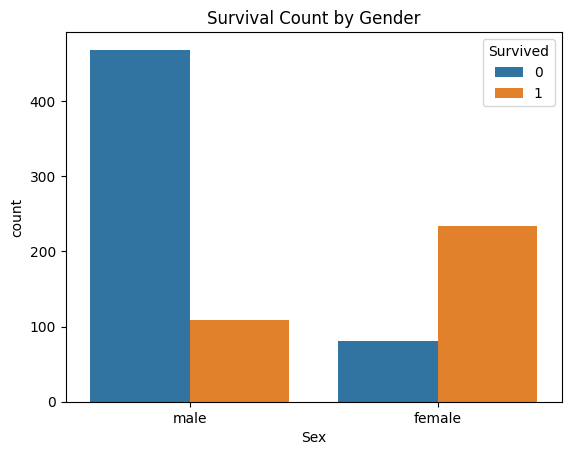

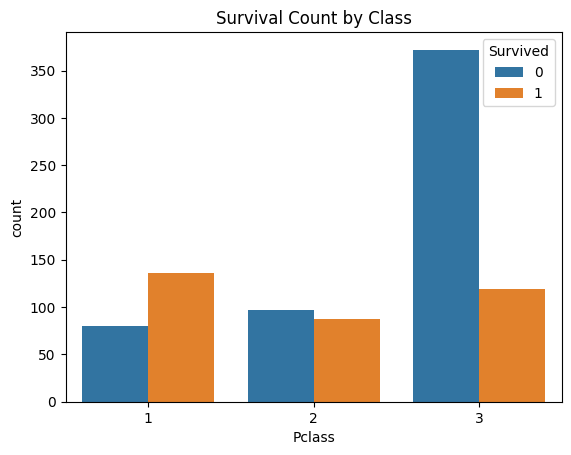

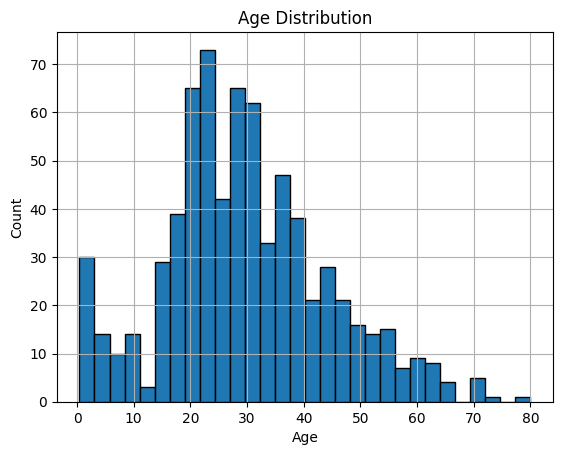

In [ ]:
# Survival rate by gender
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival Count by Gender')
plt.show()

# Survival rate by passenger class
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Count by Class')
plt.show()

# Age distribution
df['Age'].hist(bins=30, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

# Session 2: Data Cleaning & Preprocessing (60 minutes)
Step 4: Handle Missing Data

In [ ]:
# Check missing values
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


Strategy:

Age: Fill with median (robust to outliers)
Cabin: Drop entirely (too many missing)
Embarked: Fill with mode (most common value)

In [ ]:
# Fill Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column
df.drop('Cabin', axis=1, inplace=True)

# Verify no missing values in important columns
print("Missing values after cleaning:")
print(df[['Age', 'Embarked']].isnull().sum())

Missing values after cleaning:
Age         0
Embarked    0
dtype: int64


Step 5: Feature Engineering

In [ ]:
# Convert Sex to numeric (male=1, female=0)
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

# Convert Embarked to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Create FamilySize feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 for the passenger themselves

# Check the transformed data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,False,True,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,False,False,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,False,True,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,False,True,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,False,True,1


Step 6: Select Features for Model

In [ ]:
# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Embarked_Q', 'Embarked_S']
X = df[features]
y = df['Survived']

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (891, 9)
Target vector shape: (891,)


# Session 3: Model Training & Evaluation (45 minutes)
Step 7: Split Data

In [ ]:
from sklearn.model_selection import train_test_split
# The reason for spliting data is to ensure the model is trainined on unseen data. Traing with 100% of the data will cause a data leakage

# 80% train, 20% test, random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Training set: 712 samples
Test set: 179 samples


Step 8: Train Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create model
model = LogisticRegression(max_iter=10000, random_state=42) # reset max_iter to 1000 if a related failure occurs

# Train model
model.fit(X_train, y_train)
# are there ways to see more of how the training is performed?

print("Model trained successfully!")

Model trained successfully!


Step 9: Make Predictions & Evaluate

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Predict on test set
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2%}") # as a %
print(f"F1-Score: {f1:.2%}") # as a %
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 81.01%
F1-Score: 76.39%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179




Step 10: Confusion Matrix Visualization


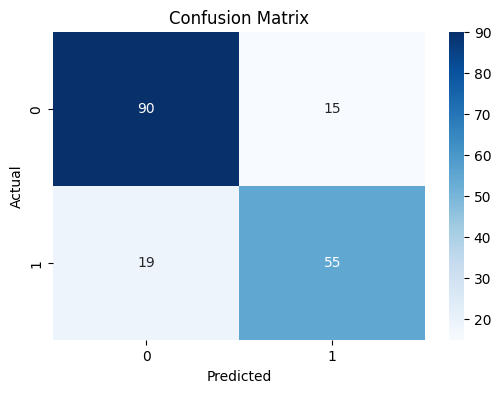

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Extension Challenges :
Feature Importance: Which features matter most?

In [ ]:
importance = pd.DataFrame({
    'feature': features,
    'coefficient': model.coef_[0]
}).sort_values('coefficient', key=abs, ascending=False)
print(importance)

      feature  coefficient
1         Sex    -2.592409
0      Pclass    -0.937049
8  Embarked_S    -0.397940
3       SibSp    -0.161319
6  FamilySize    -0.135040
7  Embarked_Q    -0.111458
2         Age    -0.030601
4       Parch     0.024763
5        Fare     0.002604
